In [1]:
# Imp libs:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Spliting data
from sklearn.model_selection import train_test_split,GridSearchCV


# Standardizing and Normalizing data:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import xgboost as xgb

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
# Importing metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Spliting data
from sklearn.model_selection import train_test_split,GridSearchCV

# Importing metrics
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

# Removing warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
file_loc1 = r"C:\Users\User\Desktop\veeresh\Internship(test)\Capstone Projects\Country-Code.xlsx"
df1 = pd.read_excel(file_loc1)

In [3]:
file_loc2 = 'https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv'
df2 = pd.read_csv(file_loc2,encoding=('ISO-8859-1')) 

In [4]:
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [5]:
df2

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [6]:
df = pd.merge (df1,df2)

In [7]:
df

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,United States,17697389,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,...,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,216,United States,17697424,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,...,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,216,United States,17697332,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,216,United States,17694056,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


In [8]:
df.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [9]:
df.tail()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,216,United States,17697389,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,...,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,216,United States,17697424,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,...,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,216,United States,17697332,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,216,United States,17694056,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9550,216,United States,17559793,Fishpatrick's Crabby Cafe,Winchester Bay,"196 Bayfront Loop, Winchester Bay, OR 97467",Winchester Bay,"Winchester Bay, Winchester Bay",-124.175346,43.678998,...,Dollar($),No,No,No,No,2,3.2,Orange,Average,16


In [10]:
df.shape

(9551, 22)

In [11]:
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [12]:
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [13]:
df.dtypes

Country Code              int64
Country                  object
Restaurant ID             int64
Restaurant Name          object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [14]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Length: 9551, dtype: bool

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


In [16]:
df.describe(include='object').T

,count,unique,top,freq
Country,9551,15,India,8652
Restaurant Name,9551,7446,Cafe Coffee Day,83
City,9551,141,New Delhi,5473
Address,9551,8918,"Sector 41, Noida",11
Locality,9551,1208,Connaught Place,122
Locality Verbose,9551,1265,"Connaught Place, New Delhi",122
Cuisines,9542,1825,North Indian,936
Currency,9551,12,Indian Rupees(Rs.),8652
Has Table booking,9551,2,No,8393
Has Online delivery,9551,2,No,7100


In [17]:
desc = df.describe().T
desc['range']=desc['max']-desc['min']
desc

,count,mean,std,min,25%,50%,75%,max,range
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02,2.150000e+02
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07,1.850060e+07
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02,3.327806e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01,9.730741e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04,1.093400e+04


In [18]:
desc[['min','mean','max','range']]

,min,mean,max,range
Country Code,1.000000,1.836562e+01,2.160000e+02,2.150000e+02
Restaurant ID,53.000000,9.051128e+06,1.850065e+07,1.850060e+07
Longitude,-157.948486,6.412657e+01,1.748321e+02,3.327806e+02
Latitude,-41.330428,2.585438e+01,5.597698e+01,9.730741e+01
Average Cost for two,0.000000,1.199211e+03,8.000000e+05,8.000000e+05
Price range,1.000000,1.804837e+00,4.000000e+00,3.000000e+00
Aggregate rating,0.000000,2.666370e+00,4.900000e+00,4.900000e+00
Votes,0.000000,1.569097e+02,1.093400e+04,1.093400e+04


In [19]:
# Feature Engineering

location_specific_details = ['Country Code', 'Country', 'Currency', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude']

restaurant_details = ['Cuisines', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu']

ratings = ['Aggregate rating', 'Rating color', 'Rating text',
       'Votes']

labels = ['Average Cost for two','Price range']

In [20]:
cont_data = df.select_dtypes(include=['int64','float64'])

cat_data= df.select_dtypes(include=['object'])

cont_columns = cont_data.columns

cat_columns = cat_data.columns

In [21]:
from scipy import stats

for i in cat_columns:
    print('For',i,', most frequent value is: ',stats.mode(df[i]),'\n\n')

For Country , most frequent value is:  ModeResult(mode=array(['India'], dtype=object), count=array([8652])) 


For Restaurant Name , most frequent value is:  ModeResult(mode=array(['Cafe Coffee Day'], dtype=object), count=array([83])) 


For City , most frequent value is:  ModeResult(mode=array(['New Delhi'], dtype=object), count=array([5473])) 


For Address , most frequent value is:  ModeResult(mode=array(['Dilli Haat, INA, New Delhi'], dtype=object), count=array([11])) 


For Locality , most frequent value is:  ModeResult(mode=array(['Connaught Place'], dtype=object), count=array([122])) 


For Locality Verbose , most frequent value is:  ModeResult(mode=array(['Connaught Place, New Delhi'], dtype=object), count=array([122])) 


For Cuisines , most frequent value is:  ModeResult(mode=array(['North Indian'], dtype=object), count=array([936])) 


For Currency , most frequent value is:  ModeResult(mode=array(['Indian Rupees(Rs.)'], dtype=object), count=array([8652])) 


For Has Table bo

In [22]:
for i in cat_columns:
    print('For column',i,'unique values are: ',df[i].unique(),'\n\n')
    print('For column',i,'count of unique values are: ',df[i].nunique(),'\n\n')
    

For column Country unique values are:  ['India' 'Australia' 'Brazil' 'Canada' 'Indonesia' 'New Zealand'
 'Phillipines' 'Qatar' 'Singapore' 'South Africa' 'Sri Lanka' 'Turkey'
 'UAE' 'United Kingdom' 'United States'] 


For column Country count of unique values are:  15 


For column Restaurant Name unique values are:  ['Jahanpanah' 'Rangrezz Restaurant' 'Time2Eat - Mama Chicken' ...
 'Tokyo Japanese Steak House' "Theo Yianni's Authentic Greek Restaurant"
 "Fishpatrick's Crabby Cafe"] 


For column Restaurant Name count of unique values are:  7446 


For column City unique values are:  ['Agra' 'Ahmedabad' 'Allahabad' 'Amritsar' 'Aurangabad' 'Bangalore'
 'Bhopal' 'Bhubaneshwar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Dehradun'
 'Faridabad' 'Ghaziabad' 'Goa' 'Gurgaon' 'Guwahati' 'Hyderabad' 'Indore'
 'Jaipur' 'Kanpur' 'Kochi' 'Kolkata' 'Lucknow' 'Ludhiana' 'Mangalore'
 'Mohali' 'Mumbai' 'Mysore' 'Nagpur' 'Nashik' 'New Delhi' 'Noida'
 'Panchkula' 'Patna' 'Puducherry' 'Pune' 'Ranchi' 'Secunder

In [23]:
for i in cat_columns:
    print('For column --',i,'-- value counts are: \n',df[i].value_counts(),'\n\n')

For column -- Country -- value counts are: 
 India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64 


For column -- Restaurant Name -- value counts are: 
 Cafe Coffee Day                       83
Domino's Pizza                        79
Subway                                63
Green Chick Chop                      51
McDonald's                            48
                                      ..
Chor Bizarre - Hotel Broadway          1
Thugs - Hotel Broadway                 1
The Kylin Experience - Holiday Inn     1
Cafe on 3 - Holiday Inn                1
Fishpatrick's Crabby Cafe              1
Name: Restaurant Name, Length: 7446, dtype: int64 


For column -- City -- 

In [24]:
"""EDA:
    
    Size: 9551 rows × 22 columns
    
    Null values: 
            Country Code            0
            Country                 0
            Restaurant ID           0
            Restaurant Name         0
            City                    0
            Address                 0
            Locality                0
            Locality Verbose        0
            Longitude               0
            Latitude                0
            Cuisines                9
            Average Cost for two    0
            Currency                0
            Has Table booking       0
            Has Online delivery     0
            Is delivering now       0
            Switch to order menu    0
            Price range             0
            Aggregate rating        0
            Rating color            0
            Rating text             0
            Votes                   0
    
    Dtypes:
            Country Code              int64
            Country                  object
            Restaurant ID             int64
            Restaurant Name          object
            City                     object
            Address                  object
            Locality                 object
            Locality Verbose         object
            Longitude               float64
            Latitude                float64
            Cuisines                 object
            Average Cost for two      int64
            Currency                 object
            Has Table booking        object
            Has Online delivery      object
            Is delivering now        object
            Switch to order menu     object
            Price range               int64
            Aggregate rating        float64
            Rating color             object
            Rating text              object
            Votes                     int64
    
    Column names: 
                ['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
                   'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
                   'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
                   'Has Online delivery', 'Is delivering now', 'Switch to order menu',
                   'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
                   'Votes']
    
    #Descriptive statistics summary:
    Average Cost for two,Votes have 0 as min value which is not possible.
    
    # Feature Engineering

location_specific_details = ['Country Code', 'Country', 'Currency', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude']

restaurant_details = ['Cuisines', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu']

ratings = ['Aggregate rating', 'Rating color', 'Rating text',
       'Votes']

labels = ['Average Cost for two','Price range']

# Univariate analysis:

For Country , most frequent value is:  ModeResult(mode=array(['India'], dtype=object), count=array([8652])) 


For Restaurant Name , most frequent value is:  ModeResult(mode=array(['Cafe Coffee Day'], dtype=object), count=array([83])) 


For City , most frequent value is:  ModeResult(mode=array(['New Delhi'], dtype=object), count=array([5473])) 


For Address , most frequent value is:  ModeResult(mode=array(['Dilli Haat, INA, New Delhi'], dtype=object), count=array([11])) 


For Locality , most frequent value is:  ModeResult(mode=array(['Connaught Place'], dtype=object), count=array([122])) 


For Locality Verbose , most frequent value is:  ModeResult(mode=array(['Connaught Place, New Delhi'], dtype=object), count=array([122])) 


For Cuisines , most frequent value is:  ModeResult(mode=array(['North Indian'], dtype=object), count=array([936])) 


For Currency , most frequent value is:  ModeResult(mode=array(['Indian Rupees(Rs.)'], dtype=object), count=array([8652])) 


For Has Table booking , most frequent value is:  ModeResult(mode=array(['No'], dtype=object), count=array([8393])) 


For Has Online delivery , most frequent value is:  ModeResult(mode=array(['No'], dtype=object), count=array([7100])) 


For Is delivering now , most frequent value is:  ModeResult(mode=array(['No'], dtype=object), count=array([9517])) 


For Switch to order menu , most frequent value is:  ModeResult(mode=array(['No'], dtype=object), count=array([9551])) 


For Rating color , most frequent value is:  ModeResult(mode=array(['Orange'], dtype=object), count=array([3737])) 


For Rating text , most frequent value is:  ModeResult(mode=array(['Average'], dtype=object), count=array([3737])) 

For column Country unique values are:  ['India' 'Australia' 'Brazil' 'Canada' 'Indonesia' 'New Zealand'
 'Phillipines' 'Qatar' 'Singapore' 'South Africa' 'Sri Lanka' 'Turkey'
 'UAE' 'United Kingdom' 'United States'] 


For column Country count of unique values are:  15 


For column Restaurant Name unique values are:  ['Jahanpanah' 'Rangrezz Restaurant' 'Time2Eat - Mama Chicken' ...
 'Tokyo Japanese Steak House' "Theo Yianni's Authentic Greek Restaurant"
 "Fishpatrick's Crabby Cafe"] 


For column Restaurant Name count of unique values are:  7446 


For column City unique values are:  ['Agra' 'Ahmedabad' 'Allahabad' 'Amritsar' 'Aurangabad' 'Bangalore'
 'Bhopal' 'Bhubaneshwar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Dehradun'
 'Faridabad' 'Ghaziabad' 'Goa' 'Gurgaon' 'Guwahati' 'Hyderabad' 'Indore'
 'Jaipur' 'Kanpur' 'Kochi' 'Kolkata' 'Lucknow' 'Ludhiana' 'Mangalore'
 'Mohali' 'Mumbai' 'Mysore' 'Nagpur' 'Nashik' 'New Delhi' 'Noida'
 'Panchkula' 'Patna' 'Puducherry' 'Pune' 'Ranchi' 'Secunderabad' 'Surat'
 'Vadodara' 'Varanasi' 'Vizag' 'Armidale' 'Balingup' 'Beechworth'
 'Dicky Beach' 'East Ballina' 'Flaxton' 'Forrest' 'Hepburn Springs'
 'Huskisson' 'Inverloch' 'Lakes Entrance' 'Lorn' 'Macedon' 'Mayfield'
 'Middleton Beach' 'Montville' 'Palm Cove' 'Paynesville' 'Penola'
 'Phillip Island' 'Tanunda' 'Trentham East' 'Victor Harbor' 'Brasí_lia'
 'Rio de Janeiro' 'Sí£o Paulo' 'Chatham-Kent' 'Consort' 'Vineland Station'
 'Yorkton' 'Bandung' 'Bogor' 'Jakarta' 'Tangerang' 'Auckland'
 'Wellington City' 'Makati City' 'Mandaluyong City' 'Pasay City'
 'Pasig City' 'Quezon City' 'San Juan City' 'Santa Rosa' 'Tagaytay City'
 'Taguig City' 'Doha' 'Singapore' 'Cape Town' 'Inner City' 'Johannesburg'
 'Pretoria' 'Randburg' 'Sandton' 'Colombo' 'Ankara' 'ÛÁstanbul'
 'Abu Dhabi' 'Dubai' 'Sharjah' 'Birmingham' 'Edinburgh' 'London'
 'Manchester' 'Albany' 'Athens' 'Augusta' 'Boise' 'Cedar Rapids/Iowa City'
 'Clatskanie' 'Cochrane' 'Columbus' 'Dalton' 'Davenport' 'Des Moines'
 'Dubuque' 'Fernley' 'Gainesville' 'Lakeview' 'Lincoln' 'Macon'
 'Mc Millan' 'Miller' 'Monroe' 'Ojo Caliente' 'Orlando' 'Pensacola'
 'Pocatello' 'Potrero' 'Princeton' 'Rest of Hawaii' 'Savannah'
 'Sioux City' 'Tampa Bay' 'Valdosta' 'Vernonia' 'Waterloo' 'Weirton'
 'Winchester Bay'] 


For column City count of unique values are:  141 


For column Address unique values are:  ['E 23, Shopping Arcade, Sadar Bazaar, Agra Cantt, Agra'
 'E-20, Shopping Arcade, Sadar Bazaar, Agra Cantt, Agra'
 'Main Market, Sadar Bazaar, Agra Cantt, Agra' ...
 '1931 Sears Street, Waterloo, IA 50702'
 '322 American Way, Weirton, WV 26062'
 '196 Bayfront Loop, Winchester Bay, OR 97467'] 


For column Address count of unique values are:  8918 


For column Locality unique values are:  ['Agra Cantt' 'Civil Lines' 'Courtyard by Marriott Agra, Tajganj' ...
 'Waterloo' 'Weirton' 'Winchester Bay'] 


For column Locality count of unique values are:  1208 


For column Locality Verbose unique values are:  ['Agra Cantt, Agra' 'Civil Lines, Agra'
 'Courtyard by Marriott Agra, Tajganj, Agra' ... 'Waterloo, Waterloo'
 'Weirton, Weirton' 'Winchester Bay, Winchester Bay'] 


For column Locality Verbose count of unique values are:  1265 


For column Cuisines unique values are:  ['North Indian, Mughlai' 'North Indian' 'Rajasthani' ...
 'Coffee and Tea, Desserts, Beverages' 'Sandwich, Sushi, Tapas'
 'Burger, Greek, Sandwich'] 


For column Cuisines count of unique values are:  1825 


For column Currency unique values are:  ['Indian Rupees(Rs.)' 'Dollar($)' 'Brazilian Real(R$)'
 'Indonesian Rupiah(IDR)' 'NewZealand($)' 'Botswana Pula(P)'
 'Qatari Rial(QR)' 'Rand(R)' 'Sri Lankan Rupee(LKR)' 'Turkish Lira(TL)'
 'Emirati Diram(AED)' 'Pounds(\x8c£)'] 


For column Currency count of unique values are:  12 


For column Has Table booking unique values are:  ['No' 'Yes'] 


For column Has Table booking count of unique values are:  2 


For column Has Online delivery unique values are:  ['No' 'Yes'] 


For column Has Online delivery count of unique values are:  2 


For column Is delivering now unique values are:  ['No' 'Yes'] 


For column Is delivering now count of unique values are:  2 


For column Switch to order menu unique values are:  ['No'] 


For column Switch to order menu count of unique values are:  1 


For column Rating color unique values are:  ['Yellow' 'Green' 'Orange' 'Dark Green' 'White' 'Red'] 


For column Rating color count of unique values are:  6 


For column Rating text unique values are:  ['Good' 'Very Good' 'Average' 'Excellent' 'Not rated' 'Poor'] 


For column Rating text count of unique values are:  6 

For column -- Country -- value counts are: 
 India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64 


For column -- Restaurant Name -- value counts are: 
 Cafe Coffee Day                       83
Domino's Pizza                        79
Subway                                63
Green Chick Chop                      51
McDonald's                            48
                                      ..
Chor Bizarre - Hotel Broadway          1
Thugs - Hotel Broadway                 1
The Kylin Experience - Holiday Inn     1
Cafe on 3 - Holiday Inn                1
Fishpatrick's Crabby Cafe              1
Name: Restaurant Name, Length: 7446, dtype: int64 


For column -- City -- value counts are: 
 New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Vineland Station       1
Yorkton                1
Bandung                1
Quezon City            1
Winchester Bay         1
Name: City, Length: 141, dtype: int64 


For column -- Address -- value counts are: 
 Sector 41, Noida                                                                      11
Dilli Haat, INA, New Delhi                                                            11
Greater Kailash (GK) 1, New Delhi                                                     10
The Imperial, Janpath, New Delhi                                                       9
The Lalit, Barakhamba Avenue, Barakhamba Road, New Delhi                               8
                                                                                      ..
G-4, Local Shopping Complex, Gujranwala Town, New Delhi                                1
State Bank Colony, Near Nanak Piau Gurudwara, GTK Road, Gujranwala Town, New Delhi     1
Shop 6 & 7, DDA Market, Near Pentamed Hospital, Gujranwala Town, New Delhi             1
A-199, Gujranwala Town, New Delhi                                                      1
196 Bayfront Loop, Winchester Bay, OR 97467                                            1
Name: Address, Length: 8918, dtype: int64 


For column -- Locality -- value counts are: 
 Connaught Place    122
Rajouri Garden      99
Shahdara            87
Defence Colony      86
Pitampura           85
                  ... 
Waltair Uplands      1
Armidale             1
Balingup             1
Beechworth           1
Winchester Bay       1
Name: Locality, Length: 1208, dtype: int64 


For column -- Locality Verbose -- value counts are: 
 Connaught Place, New Delhi             122
Rajouri Garden, New Delhi               99
Shahdara, New Delhi                     87
Defence Colony, New Delhi               86
Pitampura, New Delhi                    85
                                      ... 
Hotel Maurya, Lodipur, Patna             1
Maurya Lok, Fraser Road Area, Patna      1
Patliputra Colony, Patna                 1
Heritage Town, Puducherry                1
Winchester Bay, Winchester Bay           1
Name: Locality Verbose, Length: 1265, dtype: int64 


For column -- Cuisines -- value counts are: 
 North Indian                                 936
North Indian, Chinese                        511
Fast Food                                    354
Chinese                                      354
North Indian, Mughlai                        334
                                            ... 
Cafe, Mexican, Continental                     1
North Indian, Continental, Asian, Italian      1
Continental, Cafe                              1
North Indian, Biryani, Mughlai                 1
Burger, Greek, Sandwich                        1
Name: Cuisines, Length: 1825, dtype: int64 


For column -- Currency -- value counts are: 
 Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Brazilian Real(R$)          60
Rand(R)                     60
Emirati Diram(AED)          60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64 


For column -- Has Table booking -- value counts are: 
 No     8393
Yes    1158
Name: Has Table booking, dtype: int64 


For column -- Has Online delivery -- value counts are: 
 No     7100
Yes    2451
Name: Has Online delivery, dtype: int64 


For column -- Is delivering now -- value counts are: 
 No     9517
Yes      34
Name: Is delivering now, dtype: int64 


For column -- Switch to order menu -- value counts are: 
 No    9551
Name: Switch to order menu, dtype: int64 


For column -- Rating color -- value counts are: 
 Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64 


For column -- Rating text -- value counts are: 
 Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186

Data distribution plot and histogram indicate data is highly skewed.

Numirical columns contain outliers.

Skewness values:  
            Longitude              -3.729205
            Latitude               -3.282666
            Aggregate rating       -0.870406
            Country Code            0.000000
            Restaurant ID           0.118880
            Price range             1.047122
            Votes                   3.377989
            Average Cost for two    3.739957

# Bivariate analysis

# Multivariate analysis

# Feature correlation
Country code, latitude longitude , price range and avg cost for two columns are highly correlated.

# Multicolinearity problem exits 

# FURTHER STEPS PERFORMED
        Selection of features and target column
        Encoding categorical columns
        Normalising data using power transform
        Feature selection using principle component analysis
        Splitting training and testing data
        Model instantiation
        Model validation
        Selecting best model and hyperparameter boosting
        Result:
            Classification problem solution
                We are getting best accuracy using decision tree classifier model.
                Training acc: 100 percent
                Testing acc: 98.8783 percent.            
            Regression problem solution
                Linear regression, regulatization techniques, Decision tree regressor , random forest regressor,
                XGBoost, SVR, KNeighbours regressor model have been used to predict the best accuracy.            
        Saving the model."""
    

'EDA:\n    \n    Size: 9551 rows × 22 columns\n    \n    Null values: \n            Country Code            0\n            Country                 0\n            Restaurant ID           0\n            Restaurant Name         0\n            City                    0\n            Address                 0\n            Locality                0\n            Locality Verbose        0\n            Longitude               0\n            Latitude                0\n            Cuisines                9\n            Average Cost for two    0\n            Currency                0\n            Has Table booking       0\n            Has Online delivery     0\n            Is delivering now       0\n            Switch to order menu    0\n            Price range             0\n            Aggregate rating        0\n            Rating color            0\n            Rating text             0\n            Votes                   0\n    \n    Dtypes:\n            Country Code              int64\n      

In [25]:
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [26]:
# Grouped data analytics:

### EXPLORATORY DATA ANALYSIS

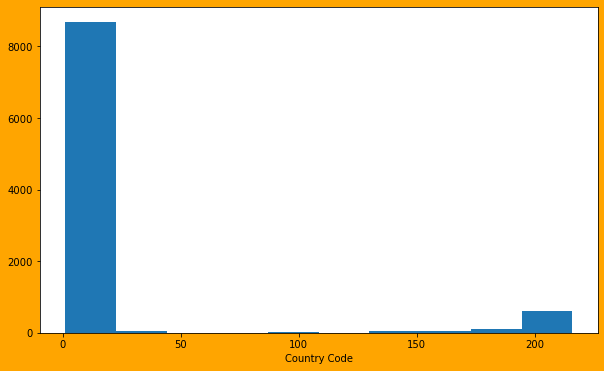

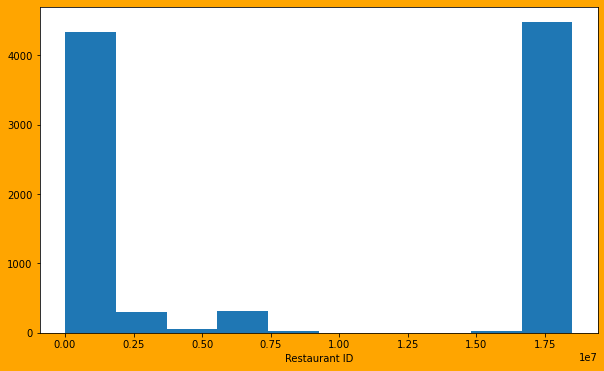

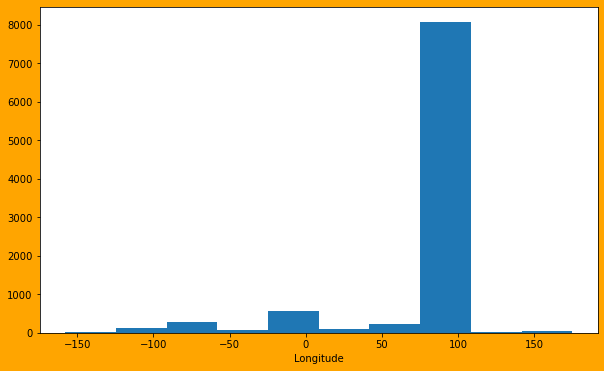

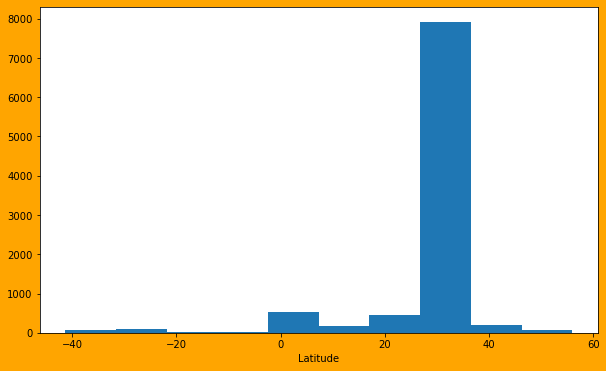

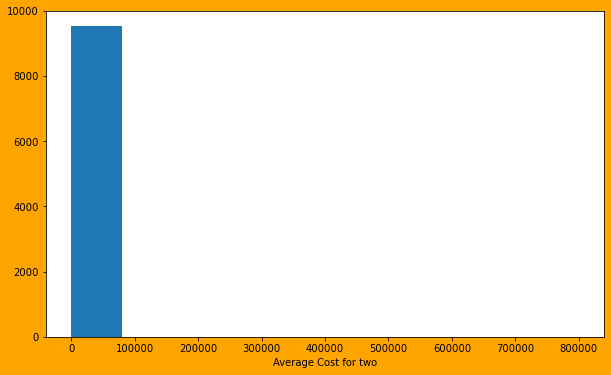

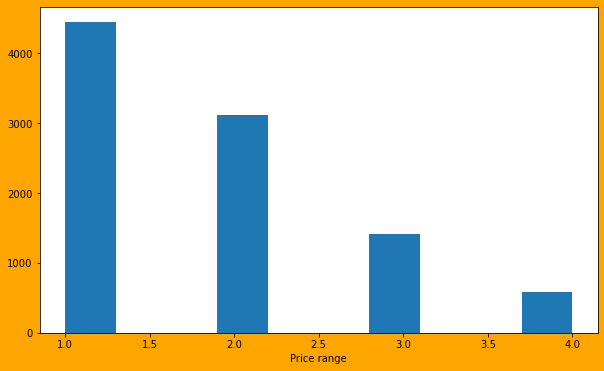

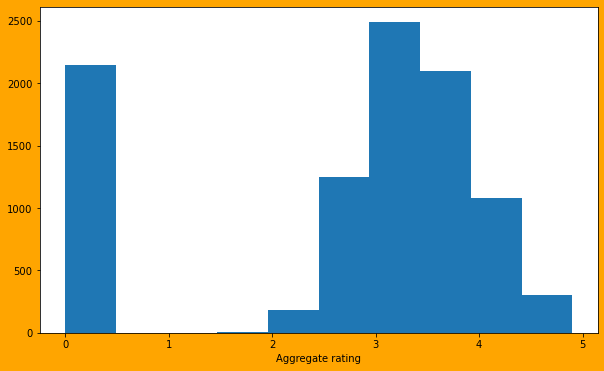

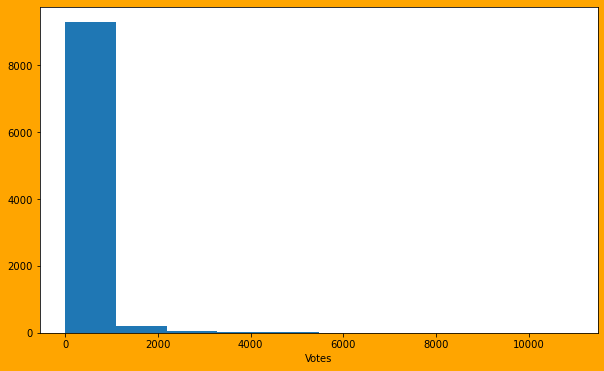

In [27]:
# Histogram plot:

for i in cont_columns:
    plt.figure(figsize=(10,6),facecolor='orange')
    plt.hist(df[i],bins=10)
    plt.xlabel(i)
    plt.show()

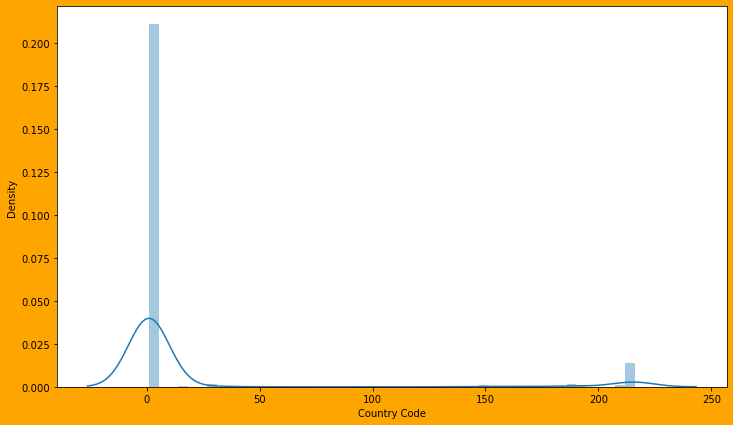

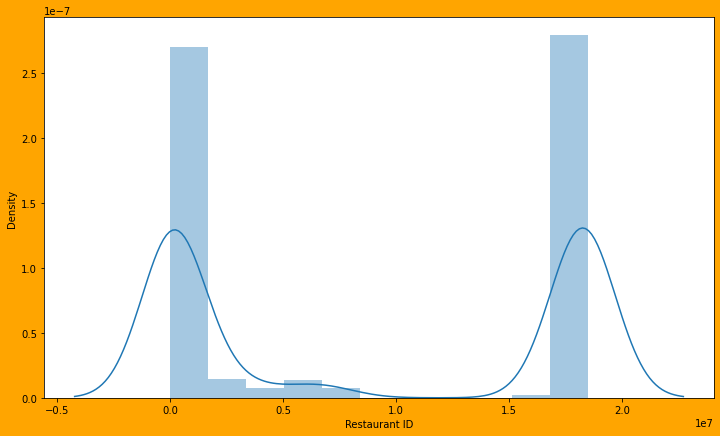

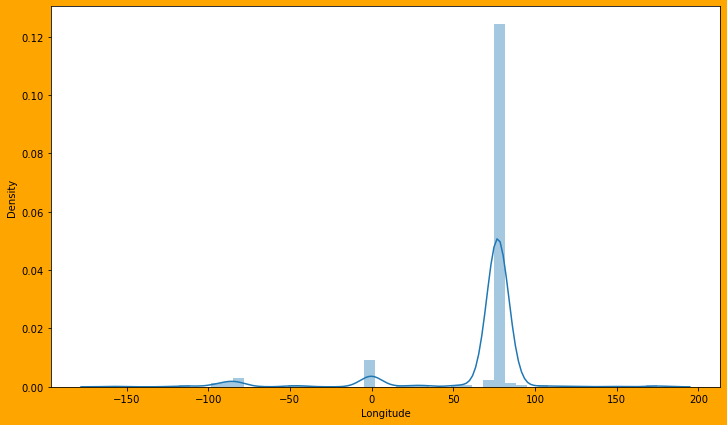

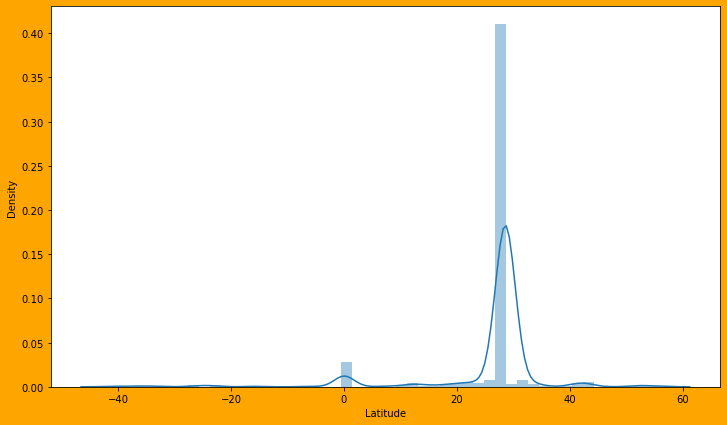

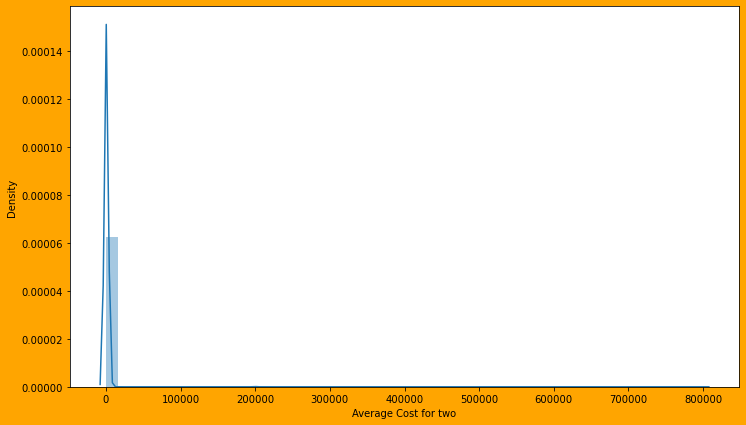

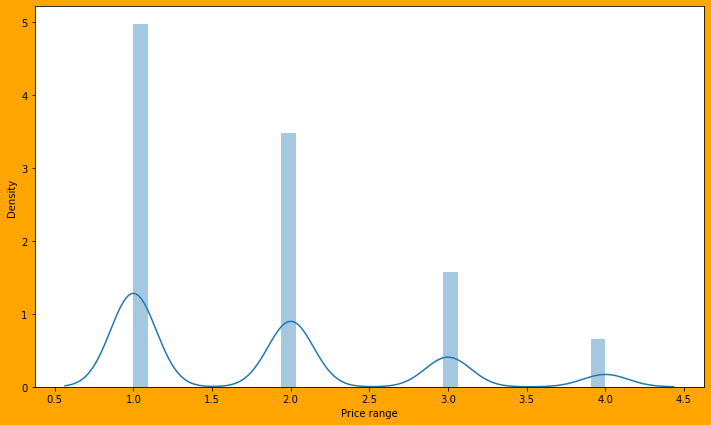

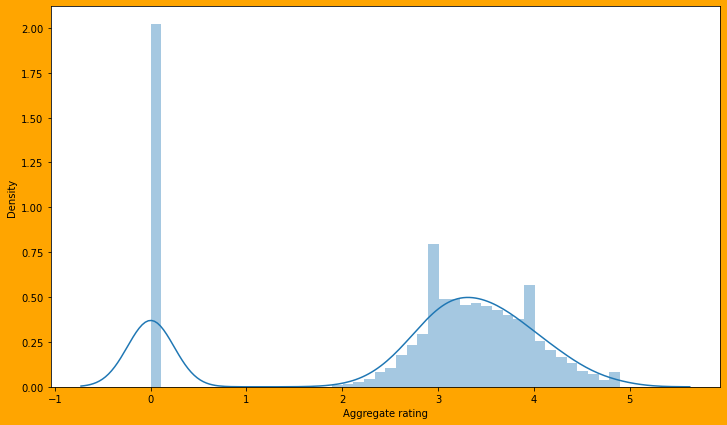

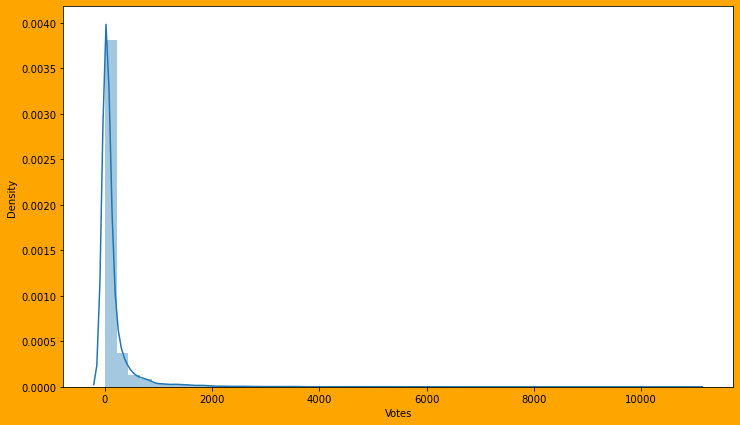

In [28]:
# Checking the distribution of continuous variables:

for i in cont_columns:
    plt.figure(figsize=(12,7),facecolor='orange')
    sns.distplot(df[i])
    plt.show()

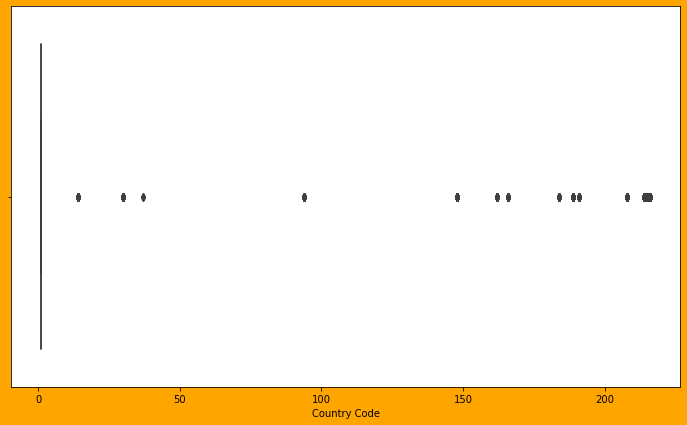

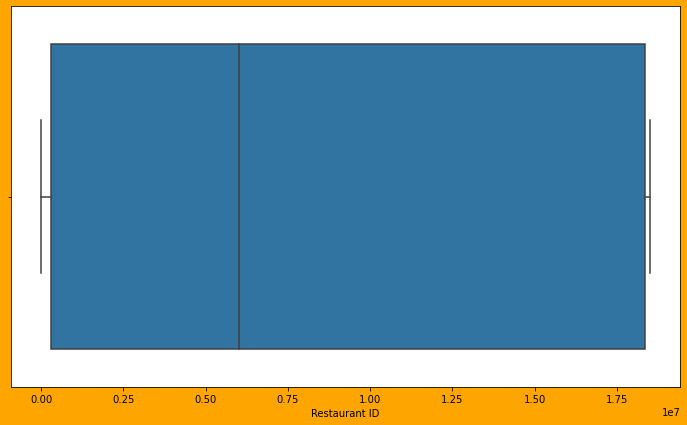

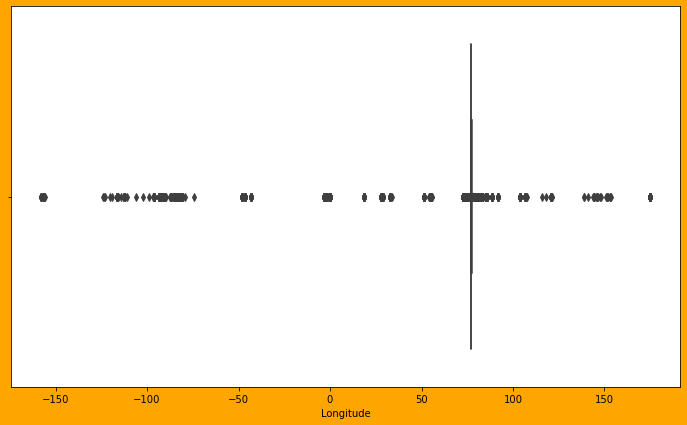

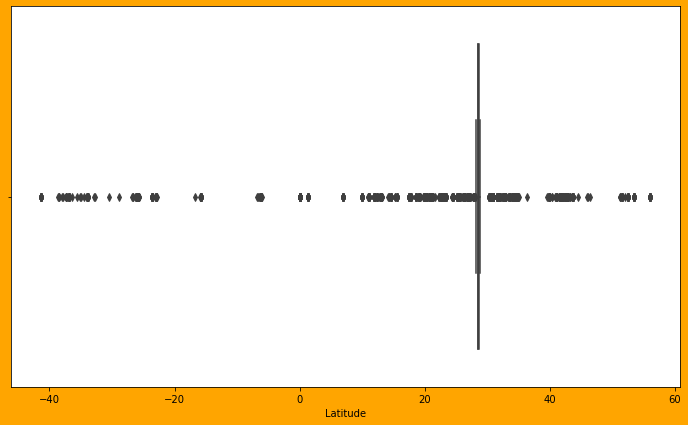

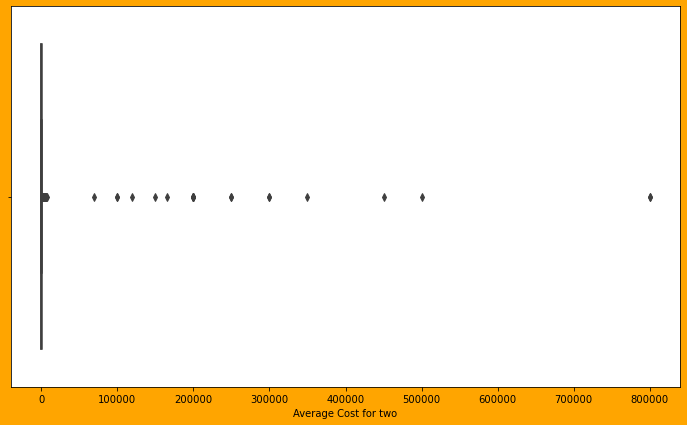

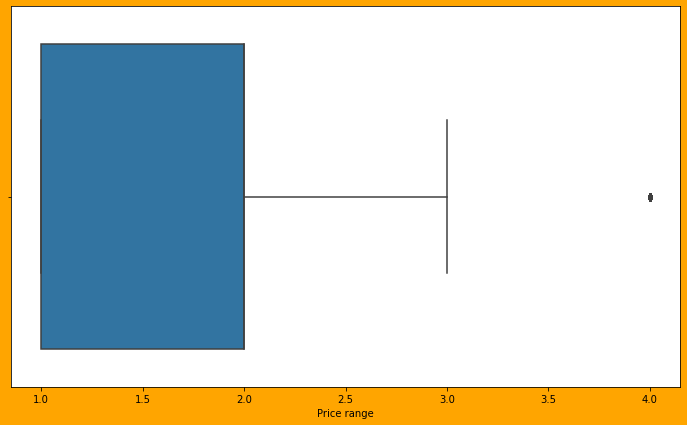

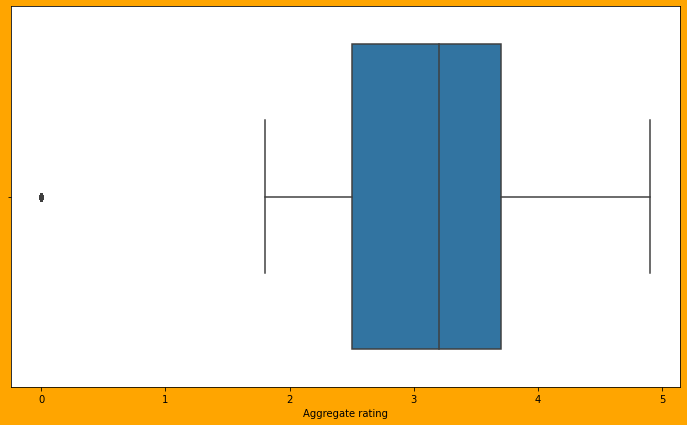

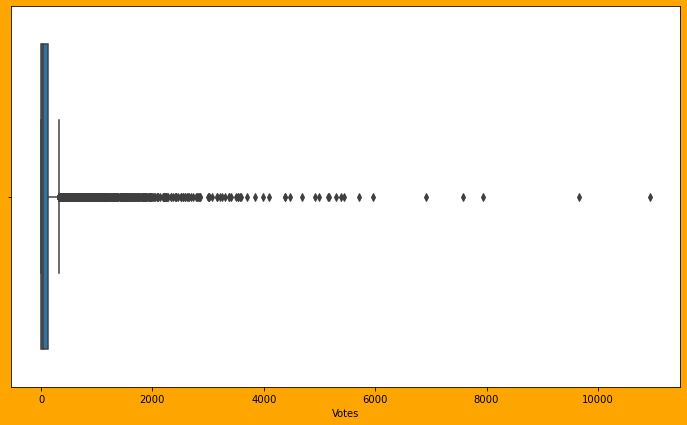

In [29]:
# Checking the outliers in continuous variables:

for i in cont_columns:
    plt.figure(figsize=(12,7),facecolor='orange')
    sns.boxplot(df[i])
    plt.show()

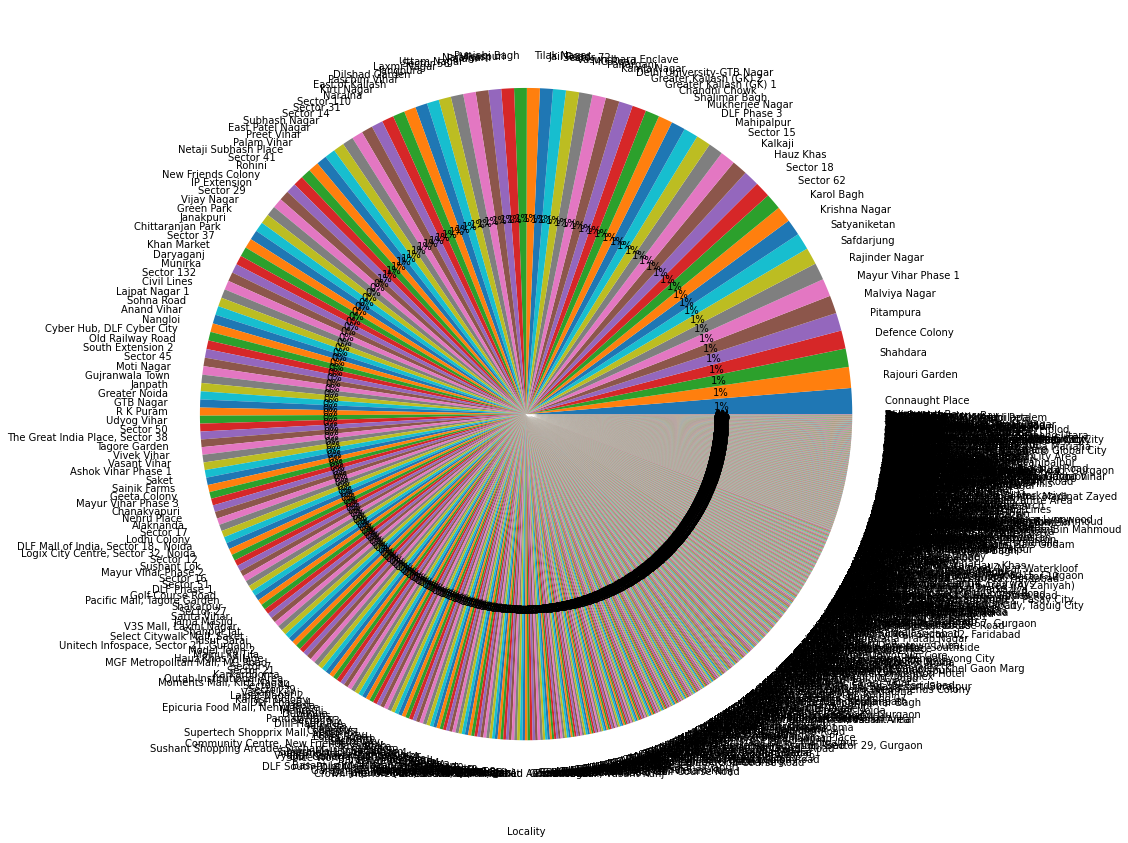

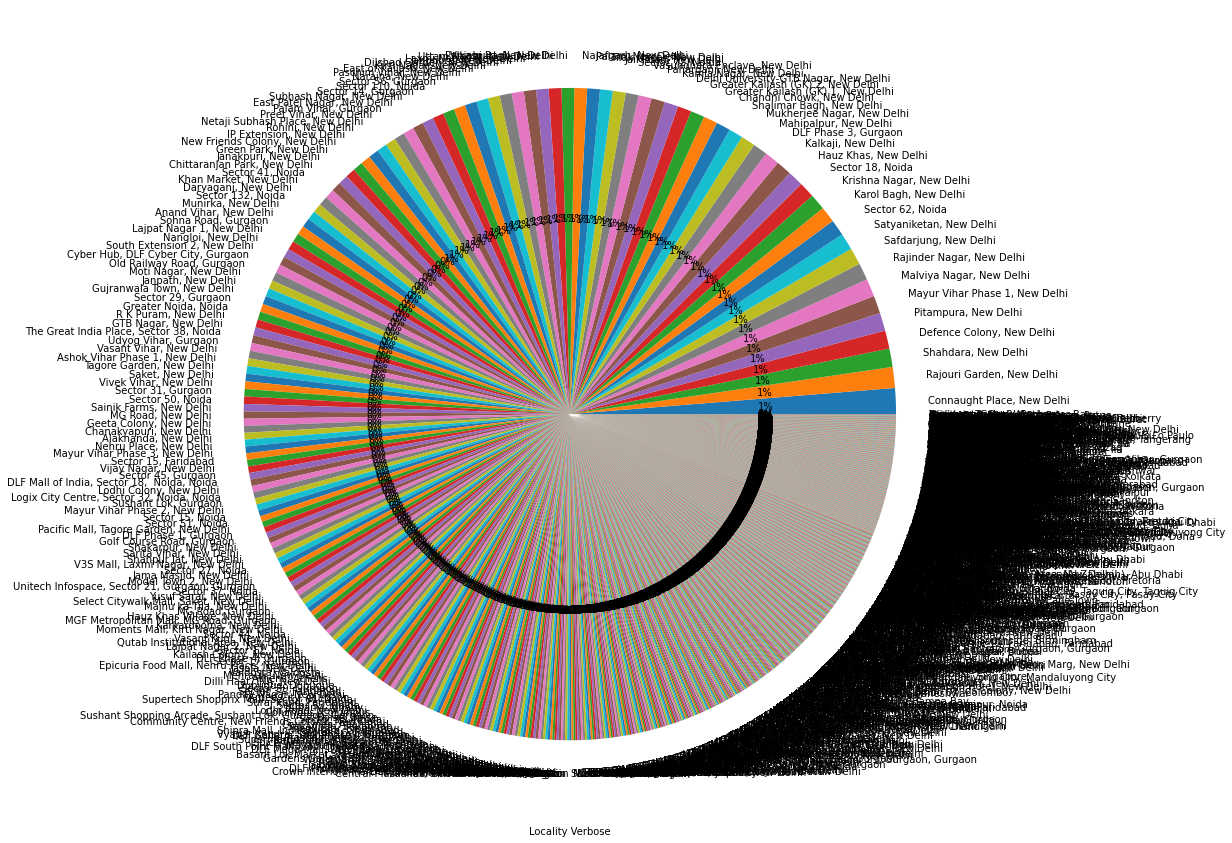

In [ ]:
for i in ['Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking']:
    plt.figure(figsize=(15,15))
    plt.pie(df[i].value_counts().values, labels=df[i].value_counts().index, autopct='%.0f%%')
    plt.xlabel(i)
    plt.show()

In [ ]:
plt.figure(figsize=(15,15))
plt.pie(df['Has Online delivery'].value_counts().values, labels=df['Has Online delivery'].value_counts().index, autopct='%.0f%%')
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
plt.pie(df['Has Online delivery'].value_counts().values, labels=df['Has Online delivery'].value_counts().index, autopct='%.0f%%')
plt.xlabel('Has Online delivery')
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
plt.pie(df['Has Table booking'].value_counts().values, labels=df['Has Table booking'].value_counts().index, autopct='%.0f%%')
plt.xlabel('Has Table booking')
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
plt.pie(df['Has Online delivery'].value_counts().values, labels=df['Has Online delivery'].value_counts().index, autopct='%.0f%%')
plt.xlabel('Has Online delivery')
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
plt.pie(df['Switch to order menu'].value_counts().values, labels=df['Switch to order menu'].value_counts().index, autopct='%.0f%%')
plt.xlabel('Switch to order menu')
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
plt.pie(df['Price range'].value_counts().values, labels=df['Price range'].value_counts().index, autopct='%.0f%%')
plt.xlabel('Price range')
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
plt.pie(df['Aggregate rating'].value_counts().values, labels=df['Aggregate rating'].value_counts().index, autopct='%.0f%%')
plt.xlabel('Aggregate rating')
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
plt.pie(df['Rating text'].value_counts().values, labels=df['Rating text'].value_counts().index, autopct='%.0f%%')
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
plt.pie(df['Has Table booking'].value_counts().values, labels=df['Has Table booking'].value_counts().index, autopct='%.0f%%')
plt.xlabel('Has Table booking')
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
plt.pie(df['Currency'].value_counts().values, labels=df['Currency'].value_counts().index, autopct='%.0f%%')
plt.xlabel('Currency')
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
plt.pie(df['Is delivering now'].value_counts().values, labels=df['Is delivering now'].value_counts().index, autopct='%.0f%%')
plt.xlabel('Is delivering now')
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
plt.pie(df['Rating color'].value_counts().values, labels=df['Rating color'].value_counts().index, autopct='%.0f%%')
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
plt.pie(df['City'].value_counts().values, labels=df['City'].value_counts().index, autopct='%.0f%%',explode=ex2)
plt.show()

In [ ]:
# Univariate analysis:

explode1 = [0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.89]

plt.figure(figsize=(15,15))
plt.pie(df['Country'].value_counts().values, labels=df['Country'].value_counts().index,explode=explode1, autopct='%.0f%%')
plt.show()

In [ ]:
df.columns

In [ ]:
# Feature Engineering

location_specific_details = ['Country Code', 'Country', 'Currency', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude']

restaurant_details = ['Cuisines', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu']

ratings = ['Aggregate rating', 'Rating color', 'Rating text',
       'Votes']

labels = ['Average Cost for two','Price range']

In [ ]:
cat_columns

In [ ]:
df['Address'][0]

In [ ]:
df['Restaurant Name']

In [ ]:
df['Locality']

In [ ]:
df['Locality Verbose']

In [ ]:
# Catplot

In [ ]:
plt.figure(figsize=(15,15))
sns.catplot(x='Rating color', kind="count",hue = 'Price range', data=df)
plt.xlabel(i)
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
sns.catplot(x='Rating text', kind="count",hue = 'Price range', data=df)
plt.xlabel(i)
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
sns.catplot(x='Has Table booking', kind="count",hue = 'Price range', data=df)
plt.xlabel('Has Table booking')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
sns.catplot(x='Switch to order menu', kind="count",hue = 'Price range', data=df)
plt.xlabel(i)
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
sns.catplot(x='Is delivering now', kind="count",hue = 'Price range', data=df)
plt.xlabel(i)
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
sns.catplot(x='Has Online delivery', kind="count",hue = 'Price range', data=df)
plt.xlabel(i)
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
sns.catplot(x='Currency', kind="count",hue = 'Price range', data=df)
plt.xlabel(i)
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
sns.catplot(x='Cuisines', kind="count",hue = 'Price range', data=df)
plt.xlabel(i)
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
sns.catplot(x='City', kind="count",hue = 'Price range', data=df)
plt.xlabel(i)
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
sns.catplot(x='Country', kind="count",hue = 'Price range', data=df)
plt.xlabel(i)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Boxplot

In [ ]:
cat_columns

In [ ]:
cont_columns

In [ ]:
df['Price range'].value_counts()

In [ ]:
df['Average Cost for two'].sort_values(ascending=False)

In [ ]:
df['Average Cost for two'].value_counts().sort_values()

In [ ]:
for i in ['Country', 'City', 'Locality',
       'Cuisines', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Rating color', 'Rating text']:
    plt.figure(figsize=(15,15))
    sns.boxplot(x='Country Code',y=i,hue = 'Price range', data=df)
    plt.xlabel('Price range')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
for i in ['Country', 'City', 'Locality',
       'Cuisines', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Rating color', 'Rating text']:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='Country Code',hue = 'Average Cost for two', data=df)
    plt.xlabel('Price range')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
for i in ['Country', 'City', 'Locality',
       'Cuisines', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Rating color', 'Rating text']:
    plt.figure(figsize=(15,15))
    sns.boxplot(x='Country Code',y=i,hue = 'Average Cost for two', data=df)
    plt.xlabel('Price range')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
cont_columns

In [ ]:
# Violin plot

plt.figure(figsize=(30,20))

sns.violinplot(x = 'Aggregate rating' , y ='Votes', data = df, hue ='Price range')

In [ ]:
# Violin plot

plt.figure(figsize=(30,20))

sns.violinplot(x = 'Country Code' , y ='Restaurant ID', data = df, hue ='Price range')

In [ ]:
# Violin plot

plt.figure(figsize=(30,20))

sns.violinplot(x = 'Country Code' , y ='Restaurant ID', data = df, hue ='Price range')

In [ ]:
cont_columns

In [ ]:
# Swarmplot 
sns.swarmplot(x = 'Country Code', y ='Average Cost for two', data = df,hue ='Price range', dodge = True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Scatterplot

for i in cont_columns:
    plt.figure(figsize=(12,8))
    sns.scatterplot(x = i,y=j, data = df,hue='Price range')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
df_copy = df.copy()

In [ ]:
df=df_copy.copy()

In [ ]:
df.shape[0]

In [ ]:
# Using Z Statistics to check and remove any more outliers:

from scipy.stats import zscore

z_score = zscore(df[cont_columns])

abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 2.5).all(axis=1) # values lying in 3 times std will be removed

df = df[filtering_entry]

df.describe()

In [ ]:
# Correlation between features and label:

# Replacing attrition column values:

df.drop(columns = 'Price range',axis = 1).corrwith(df['Price range']).plot(kind='bar',grid=True,figsize=(10,7),title='corelation between features and labels')
plt.show()

In [ ]:
# Correlation between features and label:

# Replacing attrition column values:

df.drop(columns = 'Average Cost for two',axis = 1).corrwith(df['Average Cost for two']).plot(kind='bar',grid=True,figsize=(10,7),title='corelation between features and labels')
plt.show()

In [ ]:
# Checking relationship between independent and dependent variable:

df_corr = df.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

In [ ]:
df.skew().sort_values()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df[cont_columns],i) for i in range(df[cont_columns].shape[1])]
vif['features'] = df[cont_columns].columns
vif

In [ ]:
df.drop(columns=['Country Code','Longitude'],axis=1,inplace=True)

In [ ]:
cols = ['Restaurant ID','Latitude','Price range', 'Aggregate rating', 'Votes','Average Cost for two']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df[cols],i) for i in range(df[cols].shape[1])]
vif['features'] = df[cols].columns
vif

In [ ]:
df.drop(columns=['Price range',],axis=1,inplace=True)

In [ ]:
df.drop(columns=['Restaurant ID',],axis=1,inplace=True)

In [ ]:
# Splitting data into features and label:

y1 = df['Average Cost for two']
X1 = df.drop('Average Cost for two',axis=1)

In [ ]:
X1_dum = pd.get_dummies(X1)

In [ ]:
X1_dum.shape

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt1 = PowerTransformer()

X_trans1 = pt1.fit_transform(X1_dum)

In [ ]:
# Using SelectKBest feature selection method: # It is one of the feature selection method:
# when there are lot of features and you cant graphically analyse , short way , selectKbest can be
# used:

from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest uses f_classif function to select best features where f_classif uses ANOVA test

In [ ]:
best_features1 = SelectKBest(score_func = f_classif,k = 17000)
fit1 = best_features1.fit(X_trans1,y1)

In [ ]:
fit1

In [ ]:
data_scores1 = pd.DataFrame(fit1.scores_)

In [ ]:
data_scores1

In [ ]:
print(data_scores1.nlargest(17000,data_scores1.columns),'\n') # print 7000 best features


In [ ]:
# Splitting our data to training data and testing data
# x_train,x_test,y_train,y_test

x_train,x_test,y_train,y_test = train_test_split(X_trans1,y1,test_size=0.20,random_state=1)

# Here we are keeping training data as our scalled data and testing data as our label or target.

In [ ]:
# MOdel instantiating and training

rm = LinearRegression()
rm.fit(x_train,y_train) 
# here we will pass training data

In [ ]:
# Testing our model with Adjusted R2 Square: 

# on training data

rm.score(x_train,y_train)

In [ ]:
# PLotting and visualizing

y_pred = rm.predict(x_test)

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Model Predicted')
plt.show()

In [ ]:
# Model Evaluation: MAE , MSE , RMSE

from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_absolute_error(y_test,y_pred) # 4 % error

In [ ]:
mean_squared_error(y_test,y_pred) # lesser the better

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
print("Score: ", rm.score(x_test, y_test))

In [ ]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

lassocv = LassoCV(alphas = None , max_iter = 100, normalize = True)
lassocv.fit(x_train,y_train)

In [ ]:
# Best alpha parameter
alpha = lassocv.alpha_ # Best alpha rate
alpha

In [ ]:
# Now since we have the best parameter, lasso regression will be used:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)
# i.e. when model is training it will learn at this speed 6....

In [ ]:
lasso_reg.score(x_test,y_test)

In [ ]:
# Ridge Method:

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

In [ ]:
ridgecv.alpha_ # Best alpha rate

In [ ]:
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

In [ ]:
ridge_model.score(x_test,y_test)

In [ ]:
#model performance

print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", metrics.mean_squared_error(y_test, y_pred, squared=False))
print("R2: ", metrics.r2_score(y_test, y_pred), "\n")
print("Score: ", rm.score(x_test, y_test))

In [ ]:
print(rm.coef_)
print(f"{rm.intercept_:.2f}")

In [ ]:
# Using decision tree:

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(x_train, y_train)

y_preddt = model.predict(x_test)

r2_score(y_test,y_preddt)


In [ ]:
# Random forest:

from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100)

regressor_rf.fit(x_train, y_train)

lr_normal_rf = regressor_rf.score(x_train, y_train)

lr_normal_rf

In [ ]:
y_predrf = regressor_rf.predict(x_test)

lr_normal_rf_test = regressor_rf.score(x_test, y_test)

lr_normal_rf_test

mse_lr_normal_rf  = mean_absolute_error(y_test, y_predrf)

mse_lr_normal_rf

In [ ]:
# Model Evaluation: MAE , MSE , RMSE

from sklearn.metrics import mean_absolute_error,mean_squared_error

print("MAE: ", metrics.mean_absolute_error(y_test, y_predrf))
print("MSE: ", metrics.mean_squared_error(y_test, y_predrf))
print("RMSE: ", metrics.mean_squared_error(y_test, y_predrf, squared=False))
print("R2: ", metrics.r2_score(y_test, y_predrf), "\n")
print("Score: ", regressor_rf.score(x_test, y_predrf))

In [ ]:
# Using Support vector regressor:

# Fit the model over the training data
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

y_predsvr = svr.predict(x_test)

r2_score(y_test,y_predsvr)

In [ ]:
# Using XGBoost:

xgb_clf = xgb.XGBRegressor()
xgb_clf.fit(x_train,y_train)

In [ ]:
# Using XGBoost:

xgb_clf = xgb.XGBRegressor()
xgb_clf.fit(x_train,y_train)

y_predx = xgb_clf.predict(x_test)

r2_score(y_test,y_predx)

In [ ]:
# Hyperparameter tuning for xgboost model

params = {"learning_rate"    : [0.05, 0.10] ,
         "max_depth"        : [ 3, 5, 8, 12]}

grd = GridSearchCV(xgb_clf,param_grid=params)

xgb_boosted = grd.fit(x_train,y_train)

y_predxx = xgb_boosted.predict(x_test)

r2_score(y_test,y_predxx)

# Model Evaluation: MAE , MSE , RMSE

from sklearn.metrics import mean_absolute_error,mean_squared_error

print("MAE: ", metrics.mean_absolute_error(y_test, y_predxx))
print("MSE: ", metrics.mean_squared_error(y_test, y_predxx))
print("RMSE: ", metrics.mean_squared_error(y_test, y_predxx, squared=False))
print("R2: ", metrics.r2_score(y_test, y_predxx), "\n")
print("Score: ", xgb_boosted.score(x_test, y_predxx))

In [ ]:
# Innitiate k neighbour Regressor:

from sklearn.neighbors import KNeighborsRegressor

params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()

knnmodel = GridSearchCV(knn, params, cv=5)
knnmodel.fit(x_train,y_train)
knnmodel.best_params_

In [ ]:
knn_best = KNeighborsRegressor(n_neighbors = 2)
knn_best.fit(x_train,y_train)

In [ ]:
y_predknn = knn_best.predict(x_test)

r2_score(y_test,y_predknn)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_


In [ ]:
base_model1 = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model1.fit(x_train, y_train)

In [ ]:
y_predrf = base_model1.predict(x_test)

lr_normal_rf_test = base_model1.score(x_test, y_test)

lr_normal_rf_test

mse_lr_normal_rf  = mean_absolute_error(y_test, y_predrf)

mse_lr_normal_rf

In [ ]:
# Creating pipeline:

from sklearn.pipeline import Pipeline

pipe1 = Pipeline([('pt',PowerTransformer()),
                  ('pca',PCA(n_components=17000)),('base_model1',RandomForestRegressor(n_estimators = 10, random_state = 42))])

pipe1.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

accuracy_score(y_test,y_pred)

# Saving regression model to pickle string

import pickle 
saved_model1 = pickle.dumps(pipe1) 
pipe_pickle1 = pickle.loads(saved_model1)
pipe_pickle1.predict(X_test) # predicting testing data



In [ ]:
# Solving classification problem:

df1 = df_copy

In [ ]:
df1.drop(columns=['Average Cost for two'],axis=1,inplace=True)

In [ ]:

df1.columns

In [ ]:
# Splitting data into features and label:

y = df1['Price range']
X_old = df1.drop(['Price range'],axis=1)

In [ ]:
X = pd.get_dummies(X_old)

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

X_trans = pt.fit_transform(X)

In [ ]:
best_features = SelectKBest(score_func = f_classif,k = 17000)
fit = best_features.fit(X_trans,y)

data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(X.columns)

features_score = pd.concat([data_columns,data_scores],axis=1)

features_score.columns = ['Features','Scores']
print(features_score.nlargest(17000,'Scores'),'\n') # print 7000 best features

# Here we are getting top 17000 features we got based on f_classify that uses ANOVA test of statistics.

In [ ]:
allFeat = features_score.sort_values(by='Scores',ascending=False)

In [ ]:
imp_cols = allFeat['Features'][0:17000]

In [ ]:
X_trans = X_trans[imp_cols]

In [ ]:
# Splitting our data to training data and testing data
# x_train,x_test,y_train,y_test

X_train,X_test,y_train,y_test = train_test_split(X_trans,y,test_size=0.20,random_state=1)

In [ ]:
y.unique()

In [ ]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

In [ ]:
print("Before OverSampling, counts of label '4': {}".format(sum(y_train==4)))
print("Before OverSampling, counts of label '3': {} \n".format(sum(y_train==3)))
print("Before OverSampling, counts of label '2': {}".format(sum(y_train==2)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_train==1)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '4': {}".format(sum(y_train_res==4)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res==3)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))

In [ ]:
arr = np.array(y_train_res)

un, co = np.unique(arr,return_counts=True)

dict(zip(un,co))

In [ ]:
# Random forrest classifier model:

rfc_f = RandomForestClassifier()
rfc_f.fit(X_train_res,y_train_res) 
pred_train_rfc_f = rfc_f.predict(X_train_res)
y_pred = rfc_f.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Training accuracy: ', accuracy_score(y_train_res,pred_train_rfc_f)*100)
print('Testing accuracy: ', acc*100)
confusion_mat = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',confusion_mat)
clr = classification_report(y_test,y_pred)
print('classification report: ' ,clr)

In [ ]:
# Decision Tree Classifier:

dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train_res,y_train_res) 
pred_train_dtc = dtc.predict(X_train_res)
y_pred = dtc.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Training accuracy: ', accuracy_score(y_train_res,pred_train_dtc)*100)
print('Testing accuracy: ', acc*100)
confusion_mat = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',confusion_mat)
clr = classification_report(y_test,y_pred)
print('classification report: ' ,clr)

In [ ]:
from sklearn.model_selection import KFold , cross_val_score
k_f = KFold(n_splits =3)
k_f

In [ ]:
for train,test in k_f.split([1,2,3,4,5,6,7,8,9,10]):
    print('train:',train,'test:',test)

In [ ]:
# Cross Validation score to check if model is overfitting:

cross_val_score(dtc,X_train_res,y_train_res,cv=5) # 

In [ ]:
# SVC model

svc = SVC()

svc.fit(X_train_res,y_train_res)

pred_train_svc = svc.predict(X_train_res)
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Training accuracy: ', accuracy_score(y_train_res,pred_train_svc)*100)
print('Testing accuracy: ', acc*100)
confusion_mat = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',confusion_mat)
clr = classification_report(y_test,y_pred)
print('classification report: ' ,clr)

In [ ]:
# KNN classifier:

knn = KNeighborsClassifier()
knn.fit(X_train_res,y_train_res) 
pred_train_knn = knn.predict(X_train_res)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Training accuracy: ', accuracy_score(y_train_res,pred_train_knn)*100)
print('Testing accuracy: ', acc*100)

In [ ]:
# Creating pipeline for classification model:

from sklearn.pipeline import Pipeline

pipe2 = Pipeline([('pt',PowerTransformer()),('pca1',PCA(n_components=12),('dtc',DecisionTreeClassifier(random_state=1)))])

pipe2.fit(X_train_res,y_train_res)

y_pred = pipe2.predict(X_test)

accuracy_score(y_test,y_pred)

# Saving classifier model to pickle string

import pickle 
saved_model2 = pickle.dumps(pipe2) 
pipe_pickle2 = pickle.loads(saved_model2)
pipe_pickle2.predict(X_test) # predicting testing data